(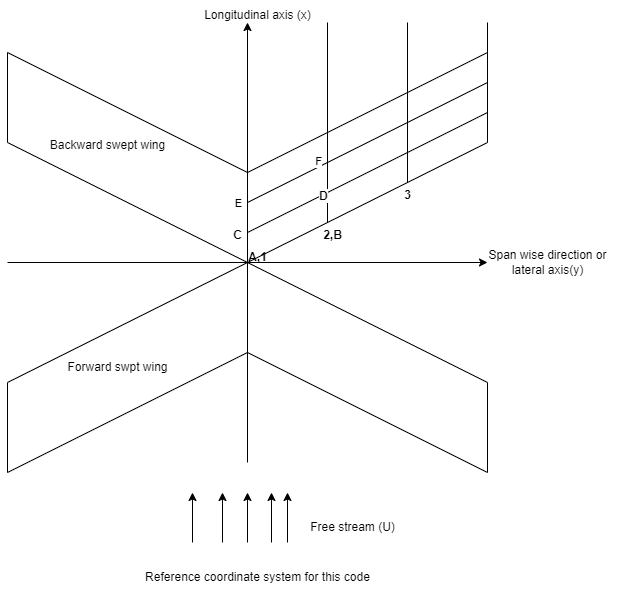)

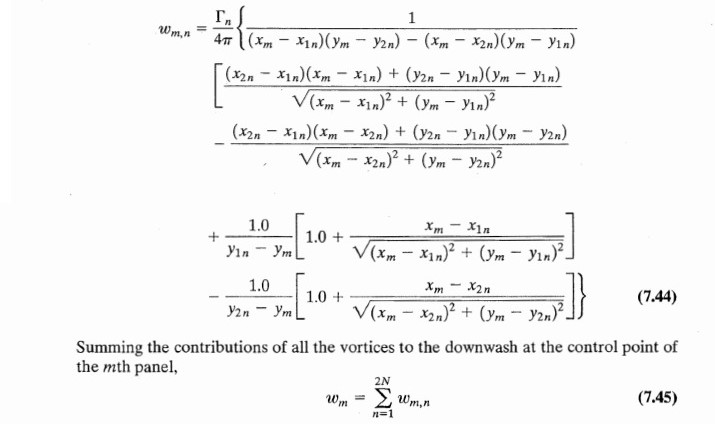

enter sweep angle of c/4 line-45
enter taper ratio of wing0.8
enter aspect ratio of wing6
enter no.of panels along chordwise4
enter no.of panels along spanwise6
[[5.31767407e+02 2.05972370e+01 2.47084219e+00 9.34469507e-01
  4.95872036e-01 3.08461270e-01]
 [3.20893922e+01 5.32187272e+02 1.80341341e+01 1.94672299e+00
  7.56799611e-01 4.15967717e-01]
 [7.76180838e+00 2.80654292e+01 5.56187111e+02 1.72929773e+01
  1.75377685e+00 6.71727134e-01]
 [3.62109156e+00 6.22798965e+00 2.74848217e+01 5.83075672e+02
  1.67755291e+01 1.64978969e+00]
 [2.11500174e+00 2.86803654e+00 5.85664634e+00 2.73213047e+01
  6.12444616e+02 1.63051387e+01]
 [1.39136190e+00 1.68797220e+00 2.62811494e+00 5.71553736e+00
  2.72658994e+01 6.44480649e+02]]
[-5.48311356 -5.48311356 -5.48311356 -5.48311356 -5.48311356 -5.48311356]
[-0.00987987 -0.00935484 -0.00894675 -0.00856237 -0.00819432 -0.00800288]
lift slope = -0.24266376000298467 per radians for aspect ratio of 6.0


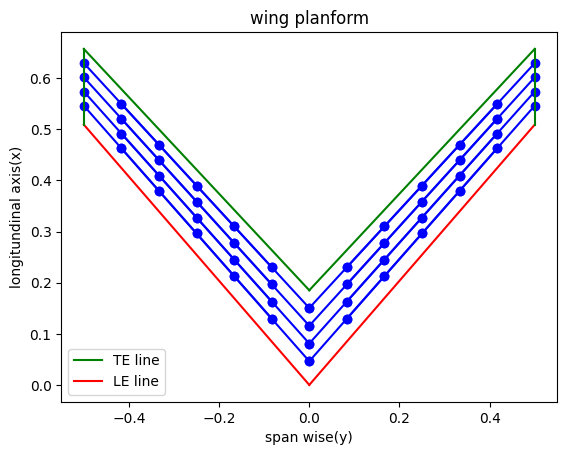

In [ ]:
## Using VLM for the uncambered, no dihedral,no twist wing
## consider chord wise panels as AB,CD,EF.....
## consider Span wise panels as 12,23,34.....
## here +ve x axis is away from the nose of wing differ from usual conventional reference
import sympy as sym
import math
import numpy as np
import matplotlib.pyplot as plt

def VLM(SW_C4,TR,AR,NX,NY): # a function that takes sweep angle (positive -forward swept. negative- Backward sswept), taper ratio,aspect ratio,
                                                   #no.of panels along chord and half-span wise as inputs
  b=1   # span of wing as unit
  U=5   # free stream
  aoa=5 # angle of attack
  rho=1.225 # Density of the flow
  c_r=(2*b)/((1+TR)*AR)   #Root chord
  if TR==0:  #for delta wing
    LE=math.atan(c_r*2/b)*180/math.pi
    print('leading edge sweep angle for Delta wing is ',LE)
    SW_C4=(math.atan((3*c_r)/(2*b)))*180/math.pi  #calculating sweep angle wrt c/4th line
    theta_c4=1*SW_C4*math.pi/180
  else:
    theta_c4=-1*SW_C4*math.pi/180  #converting sweep angle which is in degrees to radians


  ## To find sectional chord length for each y at panel endpoints
  sec_chord=np.zeros(NY+1)
  local=np.zeros(NY+1)
  for n in range(0,NY+1):
    local[n]=(n*b)/(2*NY)           # y coordinate of panel endpoints
    sec_chord[n]=c_r*(1-((2*local[n]/b)*(1-TR))) # gives the sectional chord length


  ## coordinates for the panel endpoints which are along c/4 line
  x_ns=np.zeros((NY,2*NX))  # stores x-coordinate of  all panel endpoint....[[x_A,x_B,x_C......]@12,[x_A,x_B,x_C......]@23, [x_A,x_B,x_C......]@34........]
  y_ns=np.zeros((NY,2*NX))  # stores y-coordinate of  all panel endpoint....[[y_A,y_B,y_C......]@12,[y_A,y_B,y_C......]@23, [y_A,y_B,x_C......]@34........] of starboard wing
  y_np=np.zeros((NY,2*NX)) #as like y_ns[], but stores port wing panel's y coordinates

  for i in range(0,NY): # to fix 1,2,3.....panels
    for j in range(0,2*NX,2):
      y1=(i*b)/(2*NY)  # divding the span into equal intervals and gives y_coordinate of node on same(i.e., 1st) sectionl chord
      y2=((i+1)*b)/(2*NY) #gives y_coordinate of node on other(i.e.,2nd) sectionl chord
      x1=(c_r/4)+(y1*math.tan(theta_c4))+((j/2)*(3*sec_chord[i]/(4*NX)))  #gives x_coordinate of node on same(i.e., 1st) sectionl chord from the lateral axis
      x2=(c_r/4)+(y2*math.tan(theta_c4))+((j/2)*(3*sec_chord[i+1]/(4*NX))) #gives x_coordinate of node on same(i.e., 2nd) sectionl chord from the lateral axis
      x_ns[i][j]=x1
      x_ns[i][j+1]=x2
      y_ns[i][j]=y1
      y_ns[i][j+1]=y2
      y_np[i][j]=-y1
      y_np[i][j+1]=-y2



  ## coordinates for the TE and LE based on quarter chord line just for the spanwise panels to visualize the wing planform
  x_s=[]
  y_s=[]
  y_p=[]
  for n in range(0,NY+1):
    y=(n*b)/(2*NY)
    x=(c_r/4)+(y*math.tan(theta_c4))
    x_s.append(x)  # stores x-coordinate of panel endpoint

    y_s.append(y)  # stores y-coordinate of endpoint of starboard wing
    y_p.append(-1*y) # stores y-coordinate of endpoint of portboard wing


  ##  Finding coordintes along wing to visualize the wing planform shape
  ## coordinates along LE and TE line
  x_TE=[]
  x_LE=[]
  if SW_C4>0 and TR!=0:
    for n in range(0,NY+1):
      x_TE.append(x_s[n]-(3*sec_chord[n]/4)) #stores  x-coordinate of starboard wing along Trailing edge
      x_LE.append(x_s[n]+(sec_chord[n]/4))    #stores  x-coordinate of starboard wing along leading edge
  else:
    for n in range(0,NY+1):
      x_TE.append(x_s[n]+(3*sec_chord[n]/4))
      x_LE.append(x_s[n]-(sec_chord[n]/4))
  x_sl=[x_LE[-1],x_TE[-1]]
  y_sl=[y_s[-1],y_s[-1]]
  y_sp=[y_p[-1],y_p[-1]]


  ## here the control points are chosed to be at midpoint of panel on the 3c/4th line
  ## To find sectional chord length when y is at control points(i.e., midpoint of panel length on 3c/4 th line)
  sec_chord=np.zeros(NY)
  y_cp=np.zeros(NY)
  x_cp=np.zeros(NY)
  for i in range(0,NY):
    y_cp[i]=(i*b/(2*NY))+ (b/(4*NY))   #finds y axis value of control point i.e.,b/16,3b/16,5b/16......
    sec_chord[i]=c_r*(1-((2*y_cp[i]/b)*(1-TR)))    #calculate chord length at y=b/16,3b/16,5b/16......(control points)
    x_cp[i]=((c_r/4)+(y_cp[i]*math.tan(theta_c4))+(sec_chord[i]/2))   # stores x_axis value of CP which is on  3c/4th line from lateral axis of wing


  fig = plt.figure()
  plt.plot(y_ns,x_ns,marker='o',color='b')
  plt.plot(y_np,x_ns,marker='o',color='b')
  plt.plot(y_s,x_TE,color='g',label='TE line')
  plt.plot(y_p,x_TE,color='g')
  plt.plot(y_s,x_LE,color='r',label='LE line')
  plt.plot(y_p,x_LE,color='r')
  plt.plot(y_sl,x_sl,color='g')
  plt.plot(y_sp,x_sl,color='g')
  plt.legend()
  plt.xlabel("span wise(y)")
  plt.ylabel("longitundinal axis(x)")
  plt.title('wing planform')



  #Effect of those panels on  Total lift of wing
  w_cs=np.zeros((NY,NY)) #2D array which stores contibution of every panel at each control point[[gamma12,gamma23..]@CP1,[gamma12,gamma23..]@CP2,[gamma12,gamma23....]@CP3.]
  w_cp=np.zeros((NY,NY)) #as like w_cs[], but stores for port wing

  for j in range(0,NY): # fix the control point
    for z in range(0,NY): # goes along span wise panels
      ss=0   #combined effect of all chordwise panels(AB,BC,CD...) of one (12,23,34...) panel on one control point(CP1,CP2....).
                                                                                            # as a result get gamma_AB+gamma_BC....=gamma_12
                                                                                            #                  gamma_AB+gamma_BC....=gamma_23
      sp=0   # as like ss, but stores for port wing
      for i in range(0,(NX*2-1)): # goes along chordwise panels
        fact1=(1+((x_cp[j]-x_ns[z][i])/((x_cp[j]-x_ns[z][i])**2+(y_cp[j]-y_ns[z][i])**2)**0.5))/(y_ns[z][i]-y_cp[j])
        fact2=(1+((x_cp[j]-x_ns[z][i+1])/((x_cp[j]-x_ns[z][i+1])**2+(y_cp[j]-y_ns[z][i+1])**2)**0.5))/(y_ns[z][i+1]-y_cp[j])
        term1=(((x_ns[z][i+1]-x_ns[z][i])*(x_cp[j]-x_ns[z][i]))+((y_ns[z][i+1]-y_ns[z][i])*(y_cp[j]-y_ns[z][i])))/((x_cp[j]-x_ns[z][i])**2+(y_cp[j]-y_ns[z][i])**2)**0.5
        term2=(((x_ns[z][i+1]-x_ns[z][i])*(x_cp[j]-x_ns[z][i+1]))+((y_ns[z][i+1]-y_ns[z][i])*(y_cp[j]-y_ns[z][i+1])))/((x_cp[j]-x_ns[z][i+1])**2+(y_cp[j]-y_ns[z][i+1])**2)**0.5
        fact=(term1-term2)/(((x_cp[j]-x_ns[z][i])*(y_cp[j]-y_ns[z][i+1]))-((x_cp[j]-x_ns[z][i+1])*(y_cp[j]-y_ns[z][i])))
        d_ws=(fact+fact1-fact2)   #downwash induced by each panel of startboard wing which is along chord on one control point
        #w_s.append(d_ws)
        ss=ss+d_ws

        fact1=(1+((x_cp[j]-x_ns[z][i])/((x_cp[j]-x_ns[z][i])**2+(y_cp[j]-y_np[z][i])**2)**0.5))/(y_np[z][i]-y_cp[j])
        fact2=(1+((x_cp[j]-x_ns[z][i+1])/((x_cp[j]-x_ns[z][i+1])**2+(y_cp[j]-y_np[z][i+1])**2)**0.5))/(y_np[z][i+1]-y_cp[j])
        term1=(((x_ns[z][i+1]-x_ns[z][i])*(x_cp[j]-x_ns[z][i]))+((y_np[z][i+1]-y_np[z][i])*(y_cp[j]-y_np[z][i])))/((x_cp[j]-x_ns[z][i])**2+(y_cp[j]-y_np[z][i])**2)**0.5
        term2=(((x_ns[z][i+1]-x_ns[z][i])*(x_cp[j]-x_ns[z][i+1]))+((y_np[z][i+1]-y_np[z][i])*(y_cp[j]-y_np[z][i+1])))/((x_cp[j]-x_ns[z][i+1])**2+(y_cp[j]-y_np[z][i+1])**2)**0.5
        fact=(term1-term2)/(((x_cp[j]-x_ns[z][i])*(y_cp[j]-y_np[z][i+1]))-((x_cp[j]-x_ns[z][i+1])*(y_cp[j]-y_np[z][i])))
        d_wp=(fact+fact1-fact2)   #downwash induced by one panel of port wing on one control point
        #w_p.append(-1*d_wp)
        sp=sp-d_wp
        w_cp[j][z]=sp
        w_cs[j][z]=ss


  g_ateachCp=np.zeros((NY,NY))      # stores such effect at each point[ [effect of all panels]@CP1
                                                      #  [effect of all panels]@CP2
                                                      #  [effect of all panels]@CP3
                                                      #                ......................]  ( by starboard wing+port wing panels)
  for j in range(0,NY): #To handle Control point
    for i in range(0,NY):  #To handle Panel
      x=(w_cs[j][i]+w_cp[j][i])
      g_ateachCp[j][i]=x #2D array to store effect at all control points
  c=-4*math.pi*b*U*aoa*math.pi/180
  const=np.full(NY,c)
  x = np.linalg.solve(g_ateachCp, const)  # fuction used to solve matrix [a][x]=[b] and we get strength of each panel(circulation) as result in [x]
  print(g_ateachCp)
  print(const)
  print(x)

  sectional_cl=0
  c_avg=(c_r/2)*(1+TR)   #mean chord
  for i in range(0,NY):
    lift=rho*U*x[i]          # sectional lift and is calculated depend on the sectional net circulation
    sectional_cl=lift/(0.5*rho*U*U*c_avg)+sectional_cl       #sectional lift coefficient
  Cl=2*sectional_cl*b/(2*NY)                                # net lift coefficient on the wing
  #print('coefficient of lift for aspect ratio',AR,'of=',Cl)
  dcl_daoa=Cl/(aoa*math.pi/180)   # lift curve slope
  print('lift slope =',dcl_daoa,'per radians for aspect ratio of',AR)





SW_C4=float(input('enter sweep angle of c/4 line'))
TR=float(input('enter taper ratio of wing'))
AR=float(input('enter aspect ratio of wing'))
NX=int(input('enter no.of panels along chordwise'))
NY=int(input('enter no.of panels along spanwise'))
VLM(SW_C4,TR,AR,NX,NY)









For the EX: 7.4
lift slope = 3.4442241877137136 per radians for aspect ratio of 5
Backward swept wing


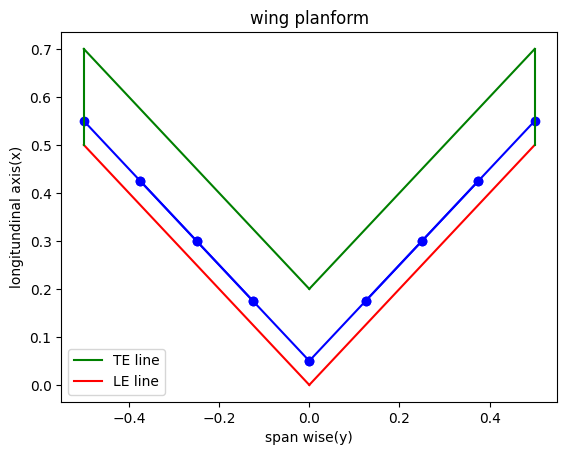

In [ ]:
print("\033[1m"+'For the EX: 7.4'+"\033[0m")
VLM(-45,1,5,1,4)
print("\033[1m"+'Backward swept wing'+"\033[0m")

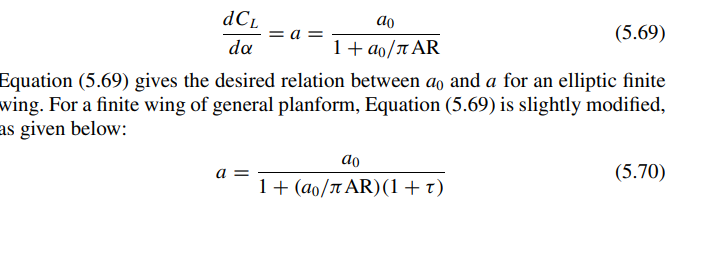

For the Problem: 7.9
lift slope = 3.7873277802285066 per radians for aspect ratio of 8
lift slope = 3.4442241877137136 per radians for aspect ratio of 5
Backward swept wing
Increase in AR leads to increase in lift-curve slope when keeping other parameters constant


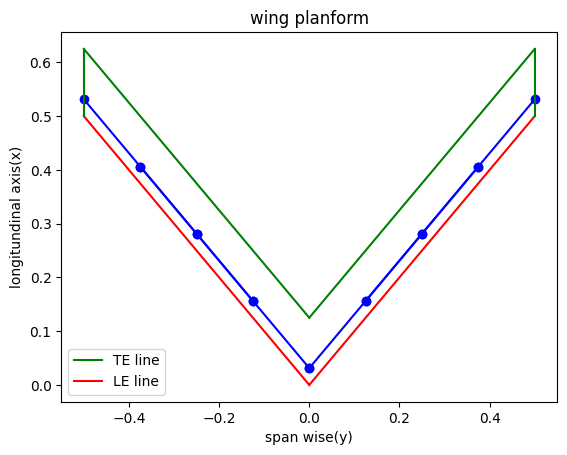

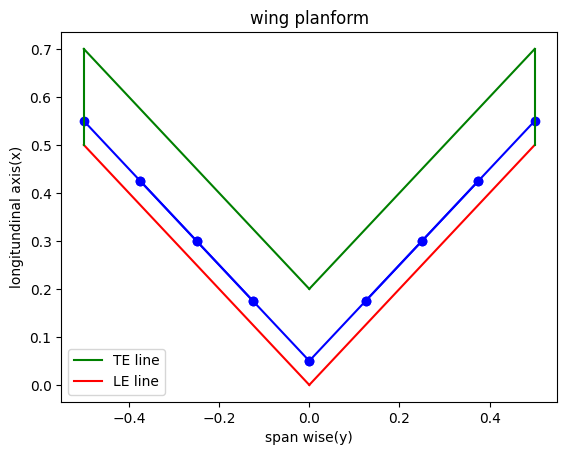

In [ ]:
print("\033[1m"+'For the Problem: 7.9'+"\033[0m")
VLM(-45,1,8,1,4)
VLM(-45,1,5,1,4)
print("\033[1m"+'Backward swept wing'+"\033[0m")
print('Increase in AR leads to increase in lift-curve slope when keeping other parameters constant')

For the Problem: 7.10
lift slope = 3.5768386836074177 per radians for aspect ratio of 5
Backward swept wing


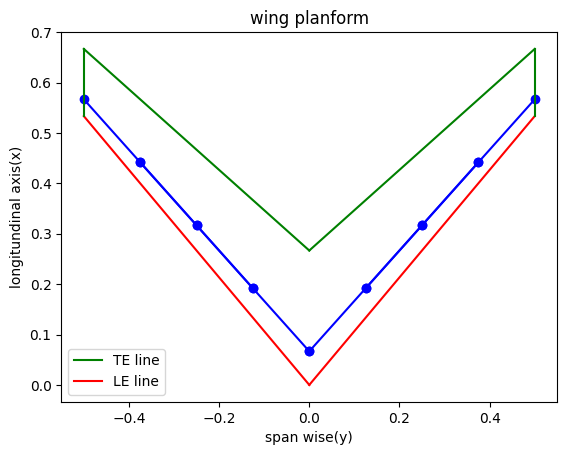

In [ ]:

print("\033[1m"+'For the Problem: 7.10'+"\033[0m")
VLM(-45,0.5,5,1,4)
print("\033[1m"+'Backward swept wing'+"\033[0m")

For the Problem: 7.11
lift slope = 3.0604250823972516 per radians for aspect ratio of 3.55
Forward swept wing


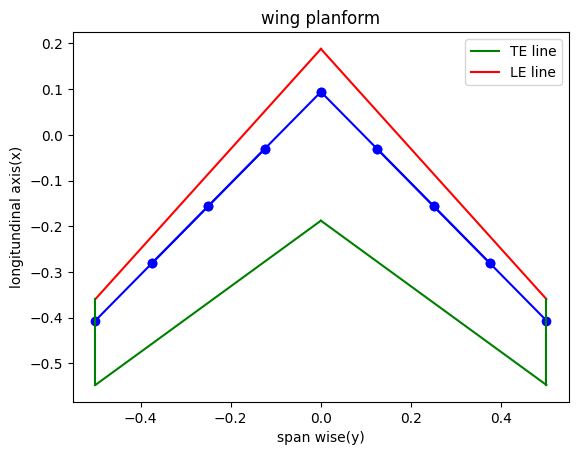

In [ ]:
print("\033[1m"+'For the Problem: 7.11'+"\033[0m")
VLM(45,0.5,3.55,1,4)
print("\033[1m"+'Forward swept wing'+"\033[0m")

For the Problem: 7.12
leading edge sweep angle for Delta wing is  69.44395478041653
lift slope = 1.7907257007033237 per radians for aspect ratio of 1.5
Forward swept wing


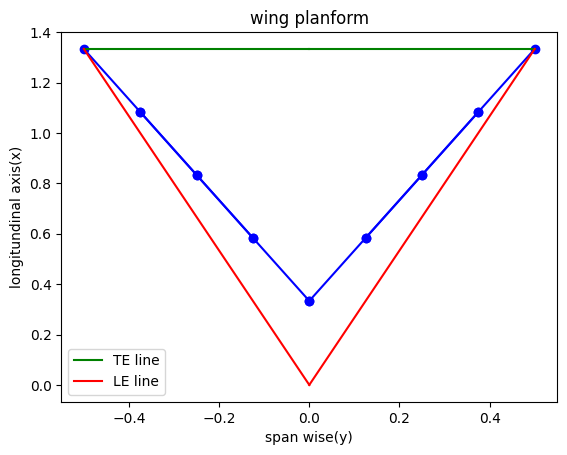

In [ ]:


print("\033[1m"+'For the Problem: 7.12'+"\033[0m")
VLM(0,0,1.5,1,4)
print("\033[1m"+'Forward swept wing'+"\033[0m")

Difference between Forward swept and Backward swept wing
Forward swept wing
lift slope = 3.3843888567123552 per radians for aspect ratio of 5
Backward swept wing
lift slope = 3.4442241877137136 per radians for aspect ratio of 5
The lift slope is higher for the backward swept wing


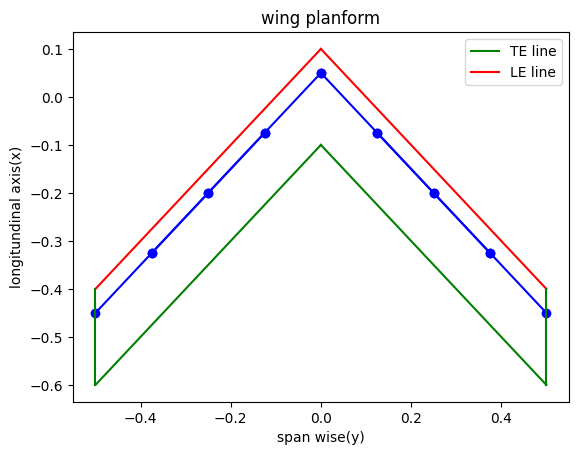

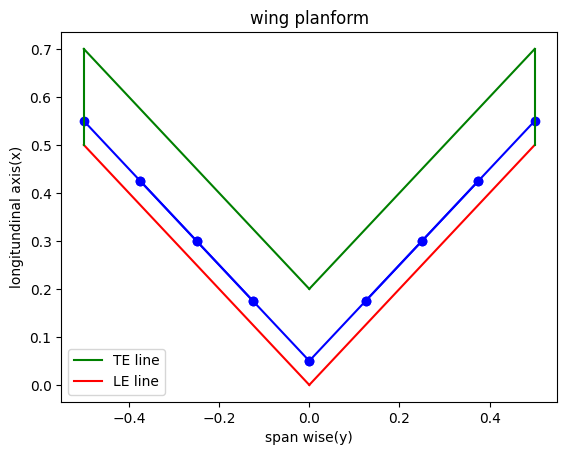

In [ ]:
print("\033[1m"+'Difference between Forward swept and Backward swept wing'+"\033[0m")
print("\033[1m"+'Forward swept wing'+"\033[0m")
VLM(45,1,5,1,4)
print("\033[1m"+'Backward swept wing'+"\033[0m")
VLM(-45,1,5,1,4)
print('The lift slope is higher for the backward swept wing')